Aim: To decide which extracted panels to keep and which to discard

## Set up

In [9]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import imagesize
from tqdm import tqdm
%matplotlib inline

In [4]:
path_root = '..'
path_data = os.path.join(path_root, 'data')
path_panels = os.path.join(path_data, 'panels')

In [5]:
list_panels_chapters = os.listdir(path_panels)

## Height vs Width -> Scatter plot

In [46]:
list_heights = []
list_widths = []
list_panel_paths = []

for chapter in tqdm(list_panels_chapters):
    path_chapter = os.path.join(path_panels, chapter)
    list_panels = os.listdir(path_chapter)
    for panel in list_panels:
        path_panel = os.path.join(path_chapter, panel)
        width, height = imagesize.get(path_panel)
        list_widths.append(width)
        list_heights.append(height)
        list_panel_paths.append(path_panel)

100%|██████████| 14/14 [00:00<00:00, 209.38it/s]


In [47]:
len(list_heights)

1427

In [55]:
arr_heights = np.array(list_heights)
arr_widths = np.array(list_widths)
arr_paths = np.array(list_panel_paths)

In [56]:
arr_area = arr_heights * arr_widths

In [158]:
# low_mask_heights = 224 <= arr_heights
# low_mask_widths = 224 <= arr_widths
# high_mask_heights = arr_heights < 3 * 224
# high_mask_widths = arr_widths < 3 * 224

# mask_heights = low_mask_heights * high_mask_heights
# mask_widths = low_mask_widths * high_mask_widths
# mask = mask_heights * mask_widths

list_masks = []
lows = [1,2,4,6,12]
highs = [2,4,6,12,16]
for i in range(len(lows)):
    low_mask = (lows[i] * 224**2) < arr_area 
    high_mask = arr_area < (highs[i] * 224**2)
    list_masks.append(high_mask * low_mask)

In [159]:
sum(list_masks[2]) / len(list_masks[2])

0.1289418360196216

In [160]:
valid_heights = arr_heights[mask]
invalid_heights = arr_heights[~mask]
valid_widths = arr_widths[mask]
invalid_widths = arr_widths[~mask]

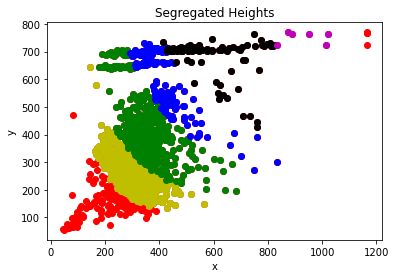

In [161]:
plt.scatter(arr_heights, arr_widths, color='r')
for i, c in enumerate(['y', 'g', 'b', 'k', 'm']):
    valid_heights = arr_heights[list_masks[i]]
    valid_widths = arr_widths[list_masks[i]] 
    plt.scatter(valid_heights, valid_widths, color=c)
plt.title('Segregated Heights')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [162]:
for i in range(len(list_masks)):
    print(len(arr_paths[list_masks[i]]))

485
507
184
101
6


0


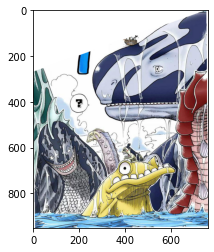

1


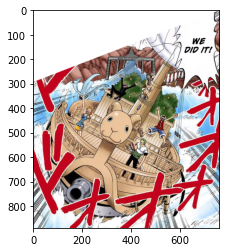

2


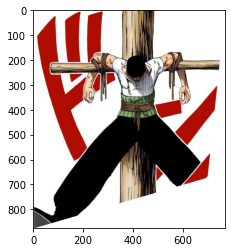

3


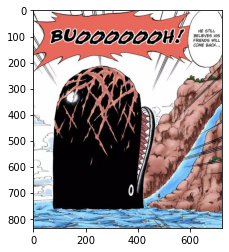

4


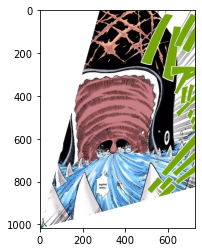

5


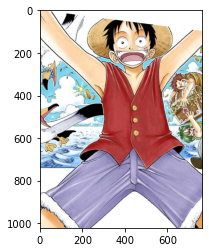

In [163]:
for i in range(len(arr_paths[list_masks[4]])):
    img = cv2.cvtColor(cv2.imread(arr_paths[list_masks[4]][i]), cv2.COLOR_BGR2RGB)
    print(i)
    plt.imshow(img)
    plt.show()

The following bounds seem to give the best results:
    224 ** 2 < area < 16 * 224 ** 2